<a href="https://colab.research.google.com/github/dacq-trap/MachineLearningWorkshop/blob/main/%E7%AC%AC5%E5%9B%9E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  # 数行で出来てしまうnext\_sentence\_prediction

In [ ]:
!pip install transformers==4.4.2
!pip install sentencepiece==0.1.91

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.0 MB 4.9 MB/s 
     |████████████████████████████████| 880 kB 48.0 MB/s 
     |████████████████████████████████| 3.3 MB 41.1 MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size=895260 sha256=8328a91b06e8ea3597fd1690de52c520674cf816d4103fc2b2663bb2181803d3
  Stored in directory: /root/.cache/pip/wheels/87/39/dd/a83eeef36d0bf98e7a4d1933a4ad2d660295a40613079bafc9
Successfully built sacremoses
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 6.3 MB/s 


In [ ]:
from transformers import T5Tokenizer, AutoModelForCausalLM

# transformers.T5Tokenizer をトークンの分割に使用する
tokenizer = T5Tokenizer.from_pretrained("rinna/japanese-gpt2-medium")
# transformers.AutoModelForCausalLM でりんなの学習済みモデルを指定する
model = AutoModelForCausalLM.from_pretrained("rinna/japanese-gpt2-medium")

Downloading:   0%|          | 0.00/806k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/153 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/282 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/799 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.37G [00:00<?, ?B/s]

In [ ]:
# 推論の実行, 好きなテキストを入れていい
input = tokenizer.encode("東京工業大学は", return_tensors="pt")
# max_lengthでなんか適当なことをしてやってもいい．
output = model.generate(input, do_sample=True, max_length=100, num_return_sequences=3)
print(tokenizer.batch_decode(output))

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


['東京工業大学は</s> 平成32年にオープンキャンパスを開催する予定です。 詳しくはこちらをご覧ください。 こちらのページにも各学校や学園祭、イベントの様子の写真が掲載されています。 オープンキャンパスは随時受付中です。 https://www.city.kaist.ed.jp/ijino/opentab/</s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s>', '東京工業大学は</s> 東京大学大学院工学系研究科 知能機械工学専攻 知能機械システム部門 の大学院生を公募いたします。 2018年2月18日 - 研究内容の詳細,採用状況,募集期間、応募方法が変更になっております。 2018年2月18日(日) - 大学院生が、東京にて「第19回 システムソフトウェア開発者教育シンポジウム」にて優秀賞受賞(優秀論文賞 技術貢献賞 優秀論文賞)となりました。', '東京工業大学は</s> 、人工知能学会が運営をおこなっている人工知能学会全国大会(sakai)を、2018年大会開催期間中に開催します。 大会期間中は、人工知能学会会員の皆さまを対象とした、学術研究の成果の発表や発表セッション、ポスターセッション等さまざまなイベントを開催します。また、学生会員は ai 教育、最先端の人工知能を活用したサービス・アプリケーション体験体験に無料で参加することができます。 講演は、人工知能学会人工知能学会全国大会(sakai)期間中(2018年2']


品質はお察しになってしまうようなこともままある．

---
# Google Translator APIを呼び出すだけの簡単なお仕事

In [ ]:
!pip install googletrans==4.0.0-rc1 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 55 kB 2.3 MB/s 
     |████████████████████████████████| 42 kB 1.2 MB/s 
     |████████████████████████████████| 1.3 MB 10.4 MB/s 
     |████████████████████████████████| 53 kB 2.1 MB/s 
     |████████████████████████████████| 65 kB 3.6 MB/s 
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17416 sha256=cce5eb496e551bc1723be5ca2a15ccc36d1b88b99c2860a67dd4fb042e08e0d5
  Stored in directory: /root/.cache/pip/wheels/43/34/00/4fe71786ea6d12314b29037620c36d857e5d104ac2748bf82a
Successfully built googletrans


In [ ]:
from googletrans import Translator

sentence = "これはペンです．"
tr = Translator()
# 翻訳して出力できる
while True:
  try:
    text = tr.translate(sentence, dest="en").text
    break
  except Exception as e:
    tr = Translator()
print(text)


this is a pen.


なので，使うこと自体はあんまり本質ではない．

---

# ザクザクとWord Cloudも作ってみよう

In [ ]:
!pip install janome
!apt-get -y install fonts-ipafont-gothic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.7 MB 1.3 MB/s 
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  fonts-ipafont-mincho
The following NEW packages will be installed:
  fonts-ipafont-gothic fonts-ipafont-mincho
0 upgraded, 2 newly installed, 0 to remove and 49 not upgraded.
Need to get 8,251 kB of archives.
After this operation, 28.7 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-ipafont-gothic all 00303-18ubuntu1 [3,526 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-ipafont-mincho all 00303-18ubuntu1 [4,725 kB]
Fetched 8,251 kB in 1s (7,057 kB/s)
Selecting previou

In [ ]:
import zipfile
import urllib.request
import os.path,glob
import re

#ダウンロードしたいURLを入力する
URL = 'https://www.aozora.gr.jp/cards/000148/files/752_ruby_2438.zip'
 
def main():
    # 文章のダウンロード
    download_text = download(URL)
    # 文章の正規化
    text = convert(download_text)
    # 文章を書き出し
    print(text)
    with open('result.txt', 'w') as f:
         f.write(text)
 
# 実際の処理は各自勉強してくれよな！
def convert(download_text):
    binarydata = open(download_text, 'rb').read()
    text = binarydata.decode('shift_jis')
 
    # ルビ、注釈などの除去
    text = re.split(r'\-{5,}', text)[2]
    text = re.split(r'底本：', text)[0]
    text = re.sub(r'《.+?》', '', text)
    text = re.sub(r'［＃.+?］', '', text)
    text = text.strip()
    return text
 
def download(url):
 # データファイルをダウンロードする
 zip_file = re.split(r'/', url)[-1]
 
 if not os.path.exists(zip_file):
     print('Download URL')
     print('URL:',url)
     urllib.request.urlretrieve(url, zip_file)
 else:
     print('Download File exists')
 
 # フォルダの生成
 dir, ext = os.path.splitext(zip_file)
 if not os.path.exists(dir):
     os.makedirs(dir)
 
 # zipファイルの展開
 zip_obj = zipfile.ZipFile(zip_file, 'r')
 zip_obj.extractall(dir)
 zip_obj.close()
 
 # zipファイルの削除
 os.remove(zip_file)
 
 # テキストファイルの抽出
 path = os.path.join(dir,'*.txt')
 list = glob.glob(path)
 return list[0]
 
if __name__ == "__main__":
    main()

Download URL
URL: https://www.aozora.gr.jp/cards/000148/files/752_ruby_2438.zip
一

　親譲りの無鉄砲で小供の時から損ばかりしている。小学校に居る時分学校の二階から飛び降りて一週間ほど腰を抜かした事がある。なぜそんな無闇をしたと聞く人があるかも知れぬ。別段深い理由でもない。新築の二階から首を出していたら、同級生の一人が冗談に、いくら威張っても、そこから飛び降りる事は出来まい。弱虫やーい。と囃したからである。小使に負ぶさって帰って来た時、おやじが大きな眼をして二階ぐらいから飛び降りて腰を抜かす奴があるかと云ったから、この次は抜かさずに飛んで見せますと答えた。
　親類のものから西洋製のナイフを貰って奇麗な刃を日に翳して、友達に見せていたら、一人が光る事は光るが切れそうもないと云った。切れぬ事があるか、何でも切ってみせると受け合った。そんなら君の指を切ってみろと注文したから、何だ指ぐらいこの通りだと右の手の親指の甲をはすに切り込んだ。幸ナイフが小さいのと、親指の骨が堅かったので、今だに親指は手に付いている。しかし創痕は死ぬまで消えぬ。
　庭を東へ二十歩に行き尽すと、南上がりにいささかばかりの菜園があって、真中に栗の木が一本立っている。これは命より大事な栗だ。実の熟する時分は起き抜けに背戸を出て落ちた奴を拾ってきて、学校で食う。菜園の西側が山城屋という質屋の庭続きで、この質屋に勘太郎という十三四の倅が居た。勘太郎は無論弱虫である。弱虫の癖に四つ目垣を乗りこえて、栗を盗みにくる。ある日の夕方｜折戸の蔭に隠れて、とうとう勘太郎を捕まえてやった。その時勘太郎は逃げ路を失って、一生懸命に飛びかかってきた。向うは二つばかり年上である。弱虫だが力は強い。鉢の開いた頭を、こっちの胸へ宛ててぐいぐい押した拍子に、勘太郎の頭がすべって、おれの袷の袖の中にはいった。邪魔になって手が使えぬから、無暗に手を振ったら、袖の中にある勘太郎の頭が、右左へぐらぐら靡いた。しまいに苦しがって袖の中から、おれの二の腕へ食い付いた。痛かったから勘太郎を垣根へ押しつけておいて、足搦をかけて向うへ倒してやった。山城屋の地面は菜園より六尺がた低い。勘太郎は四つ目垣を半分｜崩して、自分の領分へ真逆様に落ちて、ぐうと云った。勘太郎が落ちるとき

親譲り 無鉄砲 供 損 小学校 時分 学校 階 週間 腰 無闇 人 理由 新築 階 首 同級生 人 冗談 弱虫 ー い 小使 おやじ 眼 階 腰 次 親類 西洋 製 ナイフ 奇麗 刃 日 友達 人 そう そん 指 注文 指 通り 右 手 親指 甲 幸 ナイフ 親指 骨 今 親指 手 創痕 庭 東 歩 南 上がり 菜園 真中 栗 木 本 命 大事 栗 実 熟 時分 起き抜け 背戸 学校 菜園 西側 山城 屋 質屋 庭 続き 質屋 勘太郎 倅 勘太郎 弱虫 弱虫 癖 四つ 目 垣 栗 夕方 折戸 蔭 勘太郎 勘太郎 路 一生懸命 向う 二つ 年上 弱虫 力 鉢 頭 胸 拍子 勘太郎 頭 袷 袖 邪魔 手 手 袖 勘太郎 頭 右左 袖 二の腕 勘太郎 垣根 足 搦 向う 山城 屋 地面 菜園 尺 がた 勘太郎 四つ 目 垣 半分 自分 領分 真逆様 ぐうと 勘太郎 袷 袖 急 手 自由 晩 母 山城 屋 詫び 袷 袖 外 いたずら 大工 兼 公 肴 屋 角 茂作 人参 畠 人参 芽 処 藁 面 人 半日 相撲 人参 古川 田圃 井戸 尻 孟宗 節 水 ら 稲 仕掛 時分 仕掛 石 棒 井戸 水 うち 飯 古川 真赤 罰金 おやじ 母 兄 贔屓 兄 や 色 芝居 真似 女形 好き こいつ 碌 おやじ 乱暴 乱暴 行く先 母 碌 ご覧 通り 始末 行く先 無理 懲役 母 病気 日 前 台所 宙返り 角 肋骨 母 大層 顔 親類 泊り 報知 大病 例 兄 親不孝 おっかさん 兄 横っ面 大変 母 おやじ 兄 人 おやじ 男 人 顔 貴様 駄目 駄目 口癖 駄目 今 妙 おやじ 兄 実業 家 英語 勉強 元来 女 性分 仲 日 遍 割 喧嘩 ある時 将棋 卑怯 待 駒 人 そう 腹 手 飛車 眉間 擲 眉間 血 兄 おやじ おやじ 勘当 仕方 観念 先方 通り 勘当 年来 清 下女 おやじ 詫 おやじ 怒り おやじ 清 下女 気の毒 下女 由緒 そう 瓦解 零落 奉公 婆さん 婆さん 因縁 非常 不思議 母 日 前 愛想 おやじ 年中 町内 乱暴 者 悪太郎 爪弾き 珍重 人 性 他人 木 端 清 不審 清 台所 人 直 気性 賞 め 清 意味 気性 清 世辞 嫌い 常 婆さん 気性 そう 顔 自分 力 製造 気味 母 清 供 心 不審 気の毒 清 自分 小遣い 金鍔 紅梅 焼 

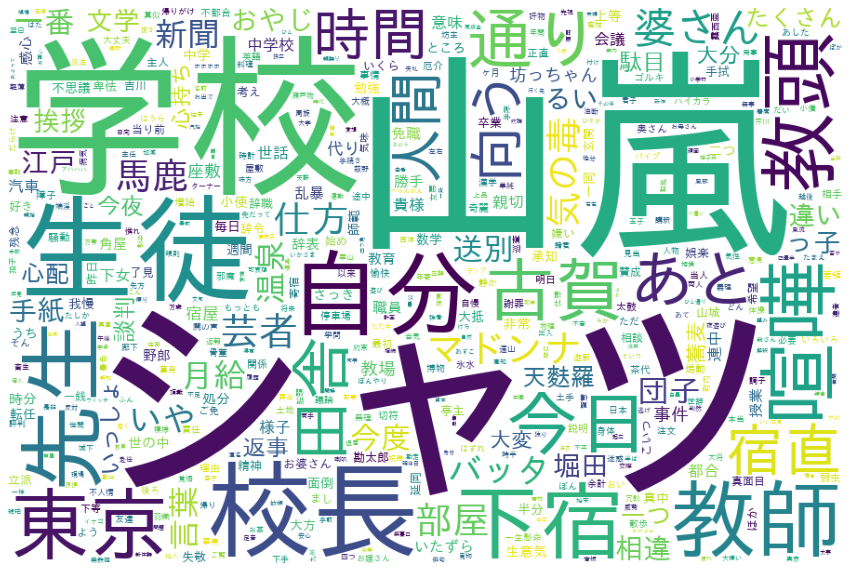

In [ ]:
from janome.tokenizer import Tokenizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt 
 
text_file = open("result.txt")
full_text = text_file.read()
full_text= full_text.replace("\n","")

# トークン化する  
t = Tokenizer()
tokens = t.tokenize(full_text)

# 名詞だけを抜き出してみる
word_list=[]
for token in tokens:
    word = token.surface
    partOfSpeech = token.part_of_speech.split(',')[0]
    partOfSpeech2 = token.part_of_speech.split(',')[1]
     
    if partOfSpeech == "名詞":
        if (partOfSpeech2 != "非自立") and (partOfSpeech2 != "代名詞") and (partOfSpeech2 != "数"):
            word_list.append(word)
 
words_wakati=" ".join(word_list)
print(words_wakati)  

stop_words = ['さん','そう']  
fpath = '/usr/share/fonts/truetype/fonts-japanese-gothic.ttf'  # 日本語フォント指定
 
# word cloudを作成してみる
wordcloud = WordCloud(
    font_path=fpath,
    width=900, height=600,   # default width=400, height=200
    background_color="white",   # default=”black”
    stopwords=set(stop_words),
    max_words=500,   # default=200
    min_font_size=4,   #default=4
    collocations = False   #default = True
    ).generate(words_wakati)
 
plt.figure(figsize=(15,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("word_cloud.png")
plt.show()